In [1]:
import numpy as np
from scipy.special import erf
import os
import sys
import time
import copy
import logging
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_dir = os.path.join(project_dir, 'src')
log_dir = os.path.join(project_dir, 'log')
fig_dir = os.path.join(project_dir, 'fig')

# Add the src directory to sys.path
sys.path.append(src_dir)

from estimator.Gaussian import GaussianEstimator
from analysis.commons import batch_estimator_estimated_delta, compute_bootstrap_range
from utils.constants import WORKERS

In [2]:
def generate_default_configuration():
    epsilon = 1
    claimed_epsilon = 1
    gamma = 0.01

    dataset_settings = {
        'database_0': [0],
        'database_1': [1],
        'sensitivity': 1.,
        'epsilon': epsilon,
        'claimed_epsilon': claimed_epsilon,
        'delta': 0.00001
    }

    kwargs = {
        'dataset_settings': dataset_settings, 
        'gamma': gamma,
        'training_set_size': 10**7, 'validation_set_size': 10**7
    }
    return kwargs

def store_array_str(data_array):
    converted_str = np.array_str(data_array)
    converted_str = converted_str.replace(' ',',')
    return converted_str

In [3]:
logfile_path = os.path.join(log_dir, 'kNN-Gaussian-default.log')

logging.basicConfig(
        level=logging.CRITICAL,
        format="%(asctime)s %(message)s",
        handlers=[
            logging.FileHandler(logfile_path),
            logging.StreamHandler()
        ]
    )

logging.info('Initialize the experimental settings')
kwargs = generate_default_configuration()

In [4]:
claimed_epsilon_list = np.hstack((np.arange(0.01, 0.1, 0.01), np.arange(0.1, 1, 0.05)))
input_list = []
for claimed_epsilon in claimed_epsilon_list:
    kwargs['dataset_settings']['claimed_epsilon'] = claimed_epsilon
    input_ = copy.deepcopy({'estimator_cls': GaussianEstimator, 'config': kwargs})
    input_list.append(input_)

estimated_delta = batch_estimator_estimated_delta(kwargs_lists=input_list, workers=60)

2024-12-08 15:48:59,100 Compute the empirical error rate requires 291.8964 seconds
2024-12-08 15:48:59,374 Compute the empirical error rate requires 293.0680 seconds
2024-12-08 15:48:59,918 Compute the empirical error rate requires 293.0645 seconds
2024-12-08 15:49:00,342 Compute the empirical error rate requires 293.6872 seconds
2024-12-08 15:49:00,737 Compute the empirical error rate requires 293.9086 seconds
2024-12-08 15:49:00,750 Compute the empirical error rate requires 293.2774 seconds
2024-12-08 15:49:01,023 Compute the empirical error rate requires 294.5295 seconds
2024-12-08 15:49:01,178 Compute the empirical error rate requires 294.2750 seconds
2024-12-08 15:49:01,195 Compute the empirical error rate requires 293.6431 seconds
2024-12-08 15:49:01,211 Compute the empirical error rate requires 294.5801 seconds
2024-12-08 15:49:01,393 Compute the empirical error rate requires 295.0010 seconds
2024-12-08 15:49:01,432 Compute the empirical error rate requires 294.8700 seconds
2024

In [5]:
from scipy import special
sensitivity = 1
epsilon1 = 1
delta1 = 0.00001
gaussian_scale = 2*np.log(1.25/delta1)*np.power(sensitivity, 2)/np.power(epsilon1, 2)
claimed_epsilon_list = np.hstack((np.arange(0.01, 0.1, 0.01), np.arange(0.1, 1, 0.05)))

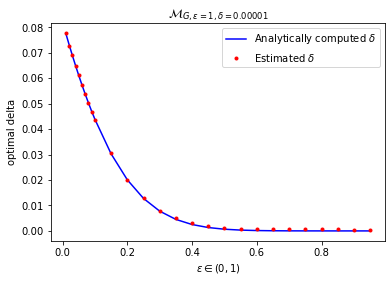

In [8]:
figfile_path = os.path.join(fig_dir, 'Gaussian_1d.png')

x_star = 0.5*(1-2*gaussian_scale*claimed_epsilon_list)
test = 0.5*(1 + special.erf(x_star/(np.sqrt(2*gaussian_scale))) - np.exp(claimed_epsilon_list)*(1 + special.erf((x_star-1)/(np.sqrt(2*gaussian_scale)))))

plt.title(r'$\mathcal{M}_{G, \epsilon=1, \delta=0.00001}$')
plt.xlabel(r"$\epsilon \in (0, 1)$")
plt.ylabel("optimal delta")

plt.plot(claimed_epsilon_list, test , color ="blue", label=r"Analytically computed $\delta$")
plt.plot(claimed_epsilon_list, estimated_delta , ".", color ="red", label=r"Estimated $\delta$")
plt.legend(loc='upper right')
plt.savefig(figfile_path, bbox_inches = 'tight', dpi = 150);
plt.show()